

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          1                 ?  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   
3          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1    hatchback          rwd           front        94.5   171.2   65.5   
2        sedan          fwd           front        99.8   176.6   66.2   
3        sedan          4wd           front        99.4   176.6   66.4   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    52.4         2823        ohcv              six          

UFuncTypeError: ignored

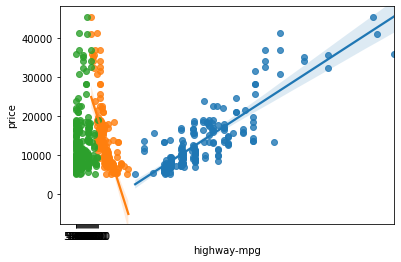

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#A file created for make testing pandas very convenient


def create_df(location, header=None):
    if header is None:
        df = pd.read_csv(location, header=None)
        return df
    else:
        df = pd.read_csv(location)
        df.columns = header
        return df


def print_4_heads(df, text):
    print('\n' + text)
    print(df.head(4))

def replace_cols_with_nan(df, col_names):
    df.dropna(subset=col_names, axis=0, how='any', inplace=True)
    for col_name in col_names:
        df[col_name] = df[col_name].replace('?', np.nan)
    return df


def replace_cols_with_mean(df, col_names):
    for col_name in col_names:
        mean=df[col_name].astype('float').mean(axis=0)
        df[col_name] = df[col_name].replace(np.nan, mean)
    return df


def change_col_types(df, col_names, target_type):
    return df[col_names].astype(target_type)


pd.set_option('display.max_columns', 200)
location = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style",
           "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
           "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
           "peak-rpm", "city-mpg", "highway-mpg", "price"]
df = create_df(location, headers)
print(print_4_heads(df, ""))
replace_cols_with_nan(df, ["price"])
replace_cols_with_mean(df, ["price"])
df["price"] = df["price"].astype("float")


#Plot Correlation
#positive correlation
sns.regplot(x="engine-size", y="price", data=df)
#negative correlation
sns.regplot(x="highway-mpg", y="price", data=df)
#weak correlation
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)